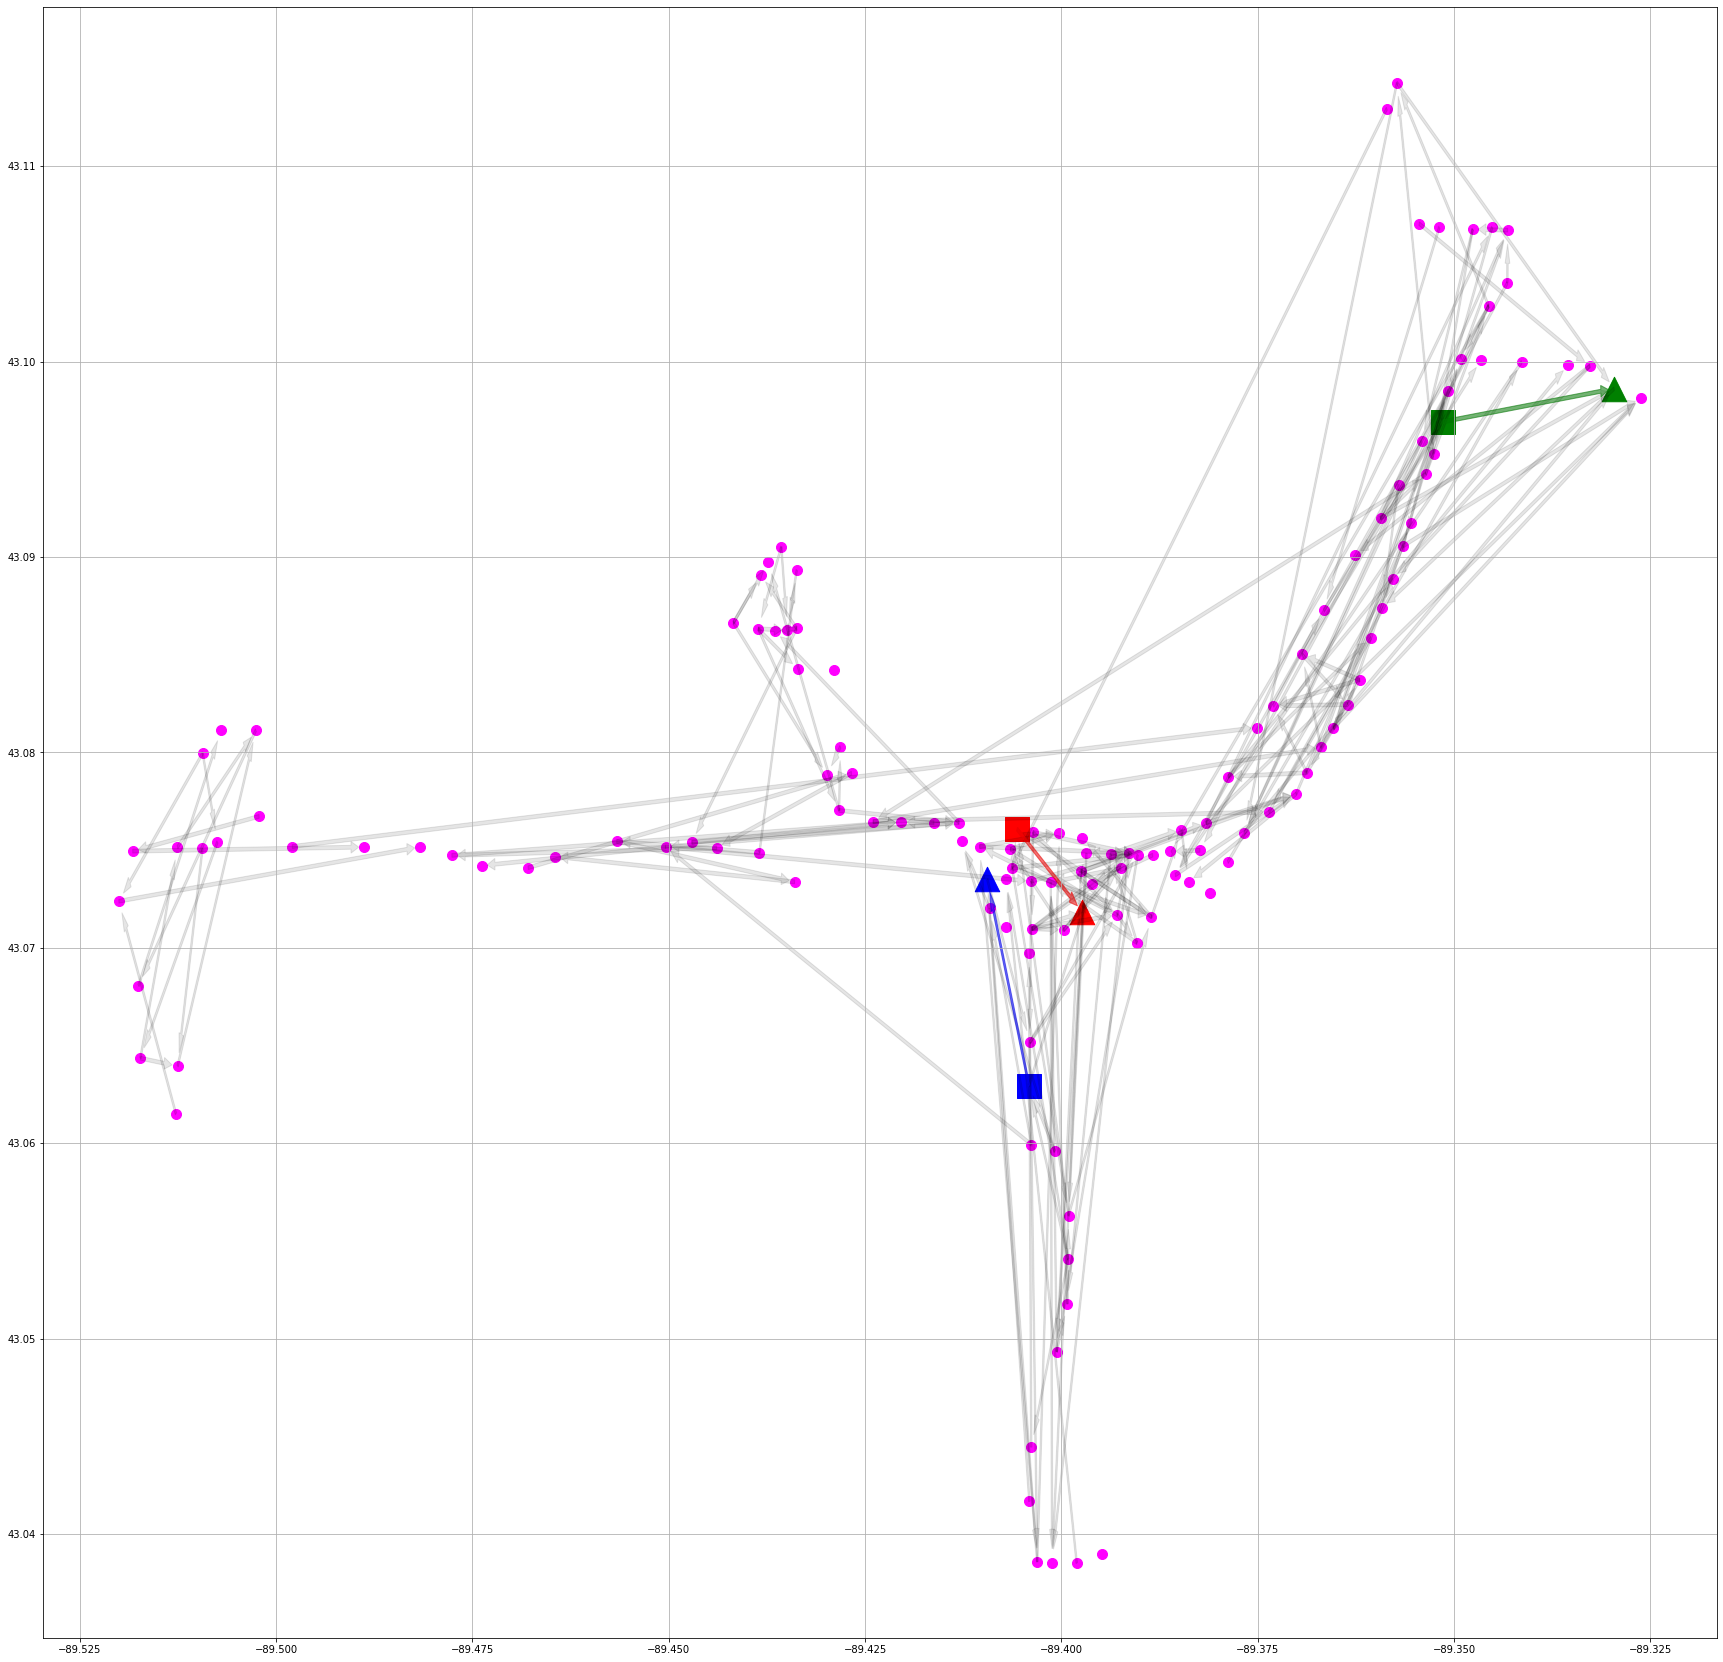

In [59]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import math


from shapely.geometry import Point


# fig, gax = plt.subplots(figsize=(10, 10))

# state_df.query("NAME == 'Wisconsin'").plot(ax=gax, edgecolor="black", color="white")
# county_df.plot(ax=gax, edgecolor="black", color="white")

fig, gax = plt.subplots(figsize=(30, 30))


def connectpoints(x,y,p1,p2, color, alpha):
    if p1 == 138 or p2 == 138:
        return
    a = x[p1], y[p1]
    b = x[p2], y[p2]

    head_length = 0.0007

    dx = b[0] - a[0]
    dy = b[1] - a[1]

    vec_ab = [dx,dy]

    vec_ab_magnitude = math.sqrt(dx**2+dy**2)

    dx = dx / vec_ab_magnitude
    dy = dy / vec_ab_magnitude

    vec_ab_magnitude = vec_ab_magnitude - head_length
    # vec_ab_magnitude = vec_ab_magnitude
    
    # arrow base = a
    
    gax.arrow(a[0], a[1], vec_ab_magnitude*dx, vec_ab_magnitude*dy,  head_length=0.001, fc=color, ec=color, width=0.0002, alpha=alpha, length_includes_head=True)
    

    # plt.scatter(a[0],a[1],color='black')
    # plt.scatter(b[0],b[1],color='black')

    # gax.annotate('', (a[0]-0.4,a[1]),fontsize=14)
    # gax.annotate('', (b[0]+0.3,b[1]),fontsize=14)

df_airports = pd.read_csv('BusStops.csv')
x = df_airports['lat']
y = df_airports['lon']

plt.scatter(x, y, s=100, marker='o',c='fuchsia',)
plt.grid()

colors = ['black', 'red', 'green', 'blue']

df_startend = pd.read_csv('start2end.csv')
start = df_startend['start_node']
end = df_startend['end_node']

for i in range(0, 3):
    plt.scatter(x[start[i]], y[start[i]], s = 600, marker="s", c = colors[i+1])
    plt.scatter(x[end[i]], y[end[i]], s = 600, marker="^", c = colors[i+1])

conn = 0
df_flight_paths = pd.read_csv("Connections" + str(conn+1) + ".csv")

s, e = df_flight_paths['start_node'], df_flight_paths['end_node']
pairs = [(s[i], e[i]) for i in range(len(s))]

alpha = 0.1
color = colors[conn]

for p in pairs:
    a,b = p
    connectpoints(x,y,a,b,color, alpha)



for conn in range(1,4):

    df_flight_paths = pd.read_csv("Connections" + str(conn+1) + ".csv")

    s, e = df_flight_paths['start_node'], df_flight_paths['end_node']
    pairs = [(s[i], e[i]) for i in range(len(s))]

    alpha = 0.5

    color = colors[conn]

    for p in pairs:
        a,b = p
        
        connectpoints(x,y,a,b,color, alpha)
